In [88]:
using Revise
using MFAScan.EnsembleTest
using Lattices, LatticeModels
using Random, Distributions
using LinearAlgebra, SparseArrays
using MFA.Ensemble
using Plots

In [78]:
struct CubicParams
    L::Int64
    W::Float64
end

In [79]:
function f(p::CubicParams;rng = Random.GLOBAL_RNG)
    H = cubic(L = p.L, M = p.L, N = p.L) .+ Diagonal(rand(rng, Uniform(-p.W, p.W), p.L^3))
end

f (generic function with 1 method)

In [85]:
L = 10
W = 3.0
E_c = 0.
E_del = 0.1
l = [1, 5]
q = collect(0.1:0.2:3);
ltc = Lattice3D(L, L, L, 1);
R = 10
nev = 10
p = CubicParams(L, W)
p_mfa = MFAParameters(ltc, l, q)
prepare_MFA!(p_mfa)

In [86]:
@time E, _, _, τ, _, _ = scan_ταf(f, p, E_c, E_del, p_mfa, c=1., R=R, nev=nev, krylovdim = 2nev+1);

  0.165417 seconds (17.10 k allocations: 78.310 MiB)


In [72]:
H = f(p)
@time shift_invert_linear_map(H, 0.);

  0.013852 seconds (668 allocations: 3.116 MiB, 27.25% compilation time)


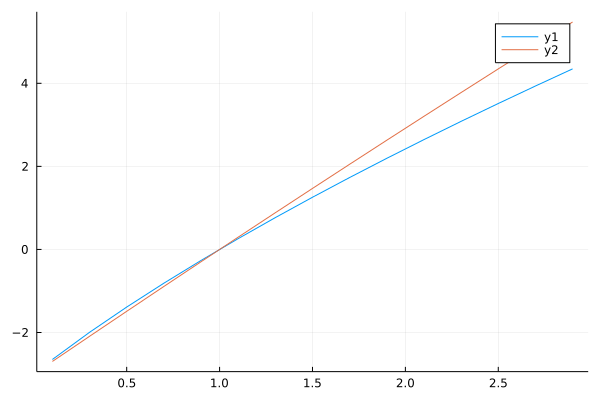

In [90]:
plot(q, τ)

In [54]:
a = [rand(10, 10) for i in 1:10];